# Two mode squeezing transformation
## Some input states are generated and a two mode squeezing transformation performed on them. Afterwards, some properties regarding entanglement and particle production are computed

##### qgt used as a module.py file

In [1]:
import sys
sys.path.append('..')
import numpy as np
import qgt
import matplotlib.pyplot as plt

In [2]:
# Generate a 2-mode Gaussian vacuum state
vacuum = qgt.Gaussian_state("vacuum", 2)

# Apply a two-mode squeezing transformation
vacuum.two_mode_squeezing(1.0, 0.0)

# Display the partial transpose
partial_transpose = vacuum.partial_transpose([0])
print("Partial transpose matrix of the state:")
print(partial_transpose.V)
print()

# Calculate the eigenvalues of the partial transpose
eigenvalues = partial_transpose.symplectic_eigenvalues()
print("Symplectic eigenvalues of the partial transpose:")
print(eigenvalues)
print()

# Calculate the logarithmic negativity
log_negativity = vacuum.logarithmic_negativity([0], [1])
print("Logarithmic negativity:")
print(log_negativity)
print()

# Calculate the expected number of photons
expected_photons = vacuum.occupation_number()
print("Expected number of quanta:")
print(expected_photons)
print()

# Calculate the von Neumann entropy
von_neumann_entropy = vacuum.von_Neumann_Entropy()
print("Von Neumann entropy:")
print(von_neumann_entropy)
print()


Partial transpose matrix of the state:
[[3.76219569 0.         3.62686041 0.        ]
 [0.         3.76219569 0.         3.62686041]
 [3.62686041 0.         3.76219569 0.        ]
 [0.         3.62686041 0.         3.76219569]]

Symplectic eigenvalues of the partial transpose:
[[0.13533528]
 [7.3890561 ]]

Logarithmic negativity:
2.885390081777928

Expected number of quanta:
[[1.38109785]
 [1.38109785]]

Von Neumann entropy:
8.036475937647972e-14



Text(0.5, 1.0, 'Dependence of Logarithmic Negativity on n$_{env}$')

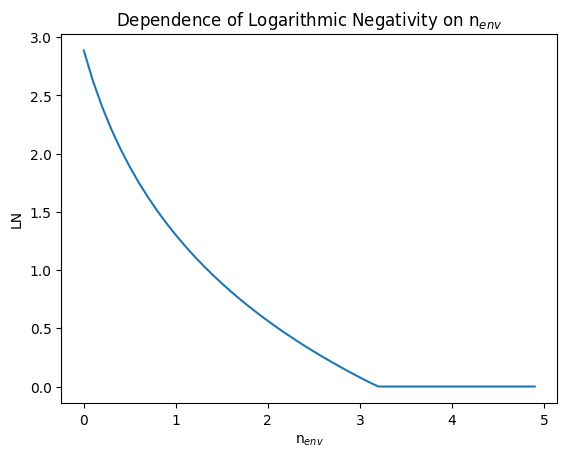

In [3]:
# Effects of thermal noise on the logarithmic negativity

# Define the range of n values
n_values = np.arange(0, 5, 0.1)

# Initialize an empty list to store the logarithmic negativity values
log_negativity_values = []

# Loop over each value of n
for n in n_values:
    # Generate the initial thermal state
    thermal_state = qgt.Gaussian_state("thermal", 2, n)

    # Apply the two-mode squeezing transformation
    thermal_state.two_mode_squeezing(1.0, 0.0)

    # Calculate the logarithmic negativity
    log_negativity = thermal_state.logarithmic_negativity([0], [1])

    # Append the logarithmic negativity value to the list
    log_negativity_values.append(log_negativity)

# Plot the logarithmic negativity values against n
plt.plot(n_values, log_negativity_values)
plt.xlabel('n$_{env}$')
plt.ylabel('LN')
plt.title('Dependence of Logarithmic Negativity on n$_{env}$')

Text(0.5, 1.0, 'Dependence of Logarithmic Negativity on n$_{env}$')

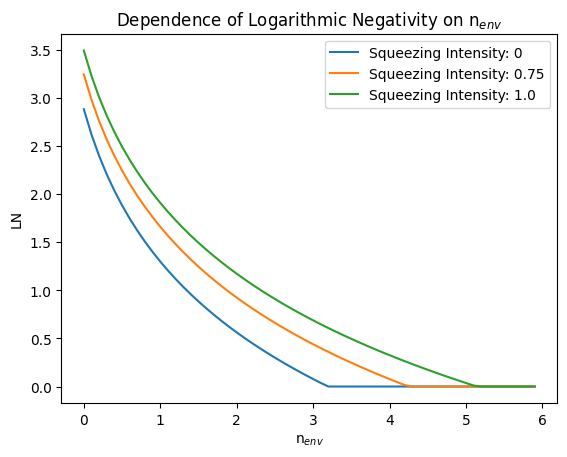

In [5]:
# Effects of squeezing intensity on the logarithmic negativity

squeezing_intensities = [0, 0.75, 1.0]
nbar = np.arange(0, 6, 0.1)

for intensity in squeezing_intensities:
    # Initialize an empty list to store the logarithmic negativity values
    log_negativity_values = []
    for n in nbar:
        # Generate the squeezed-thermal state
        squeezed_thermal_state = qgt.Gaussian_state("squeezed", 1, intensity)
        squeezed_thermal_state.tensor_product_append([qgt.Gaussian_state("vacuum", 1)])
        squeezed_thermal_state.add_thermal_noise(n)

        # Apply the two-mode squeezing transformation
        squeezed_thermal_state.two_mode_squeezing(1.0, 0.0)

        # Calculate the logarithmic negativity
        log_negativity = squeezed_thermal_state.logarithmic_negativity([0], [1])

        # Append the logarithmic negativity value to the list
        log_negativity_values.append(log_negativity)

    # Plot the logarithmic negativity values against n
    plt.plot(nbar, log_negativity_values, label=f'Squeezing Intensity: {intensity}')

plt.xlabel('n$_{env}$')
plt.ylabel('LN')
plt.legend()
plt.title('Dependence of Logarithmic Negativity on n$_{env}$')

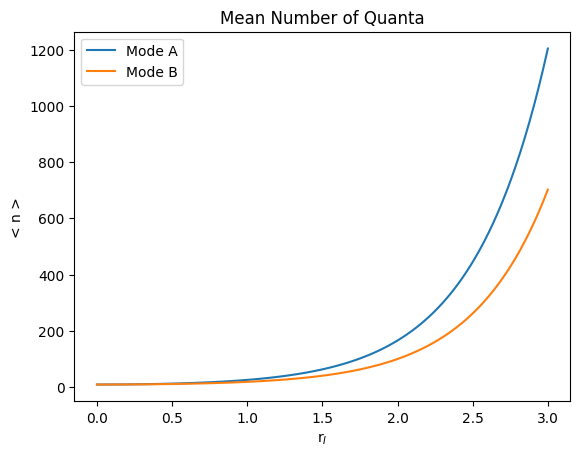

In [31]:
# Effects of squeezing intensity on the mean number of quanta

# Define the squeezing intensities and the thermal mean number of quanta
squeezing_intensities = np.linspace(0, 3.0, 100)
nbar = 2.0

# Initialize an array for the two plots
mean_number_quanta_A = np.empty_like(squeezing_intensities)
mean_number_quanta_B = np.empty_like(squeezing_intensities)

# Loop over each value of the squeezing intensity
for i, intensity in enumerate(squeezing_intensities):
    # Generate the squeezed-thermal state
    squeezed_thermal_state = qgt.Gaussian_state("squeezed", 1, intensity)
    squeezed_thermal_state.tensor_product_append([qgt.Gaussian_state("vacuum", 1)])
    squeezed_thermal_state.add_thermal_noise(nbar)

    # Apply the two-mode squeezing transformation
    squeezed_thermal_state.two_mode_squeezing(1.0, 0.0)

    # Calculate the mean number of quanta
    n = squeezed_thermal_state.occupation_number()

    # Store the mean number of quanta in the matrix
    mean_number_quanta_A[i] = n[0] 
    mean_number_quanta_B[i] = n[1]

# Plot the mean number of quanta against the squeezing intensity


plt.plot(squeezing_intensities, mean_number_quanta_A, label='Mode A')
plt.plot(squeezing_intensities, mean_number_quanta_B, label='Mode B')
plt.xlabel('r$_{I}$')
plt.ylabel('< n >')
plt.title('Mean Number of Quanta')
plt.legend()

plt.show()





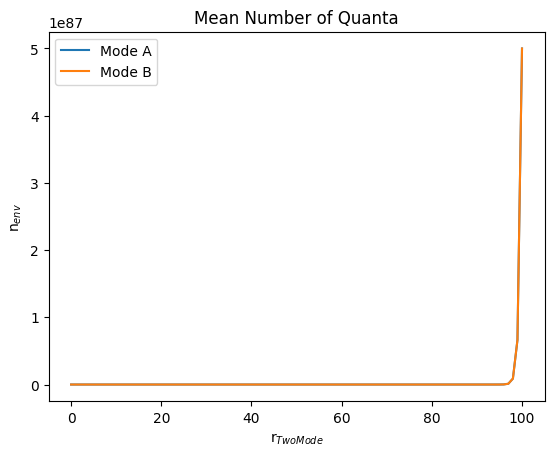

In [27]:
# Effects of two-mode squeezing intensity on the creation of quanta

# Define the squeezing intensities and the thermal mean number of quanta
squeezing_intensities = np.linspace(0, 1.0, 100)
nbar = 2.0
single_mode_squeezing = 1.5

# Initialize an array for the two plots
mean_number_quanta_A = np.empty_like(squeezing_intensities)
mean_number_quanta_B = np.empty_like(squeezing_intensities)

# Loop over each value of the squeezing intensity
for i, intensity in enumerate(squeezing_intensities):
    # Generate the squeezed-thermal state
    squeezed_thermal_state = qgt.Gaussian_state("squeezed", 1, single_mode_squeezing)
    squeezed_thermal_state.tensor_product_append([qgt.Gaussian_state("vacuum", 1)])
    squeezed_thermal_state.add_thermal_noise(nbar)

    # Apply the two-mode squeezing transformation
    squeezed_thermal_state.two_mode_squeezing(intensity, 0.0)

    # Calculate the mean number of quanta
    n = squeezed_thermal_state.occupation_number()

    # Store the mean number of quanta in the matrix
    mean_number_quanta_A[i] = n[0] 
    mean_number_quanta_B[i] = n[1]

# Plot the mean number of quanta against the squeezing intensity


plt.plot(squeezing_intensities, mean_number_quanta_A, label='Mode A')
plt.plot(squeezing_intensities, mean_number_quanta_B, label='Mode B')
plt.xlabel('r$_{TwoMode}$')
plt.ylabel('n$_{env}$')
plt.title('Mean Number of Quanta')
plt.legend()

plt.show()

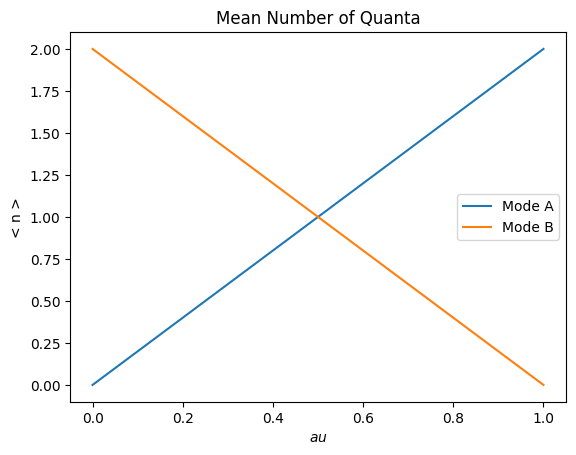

In [35]:
# Effects of beam splitter to the mean number of quanta

# Define the beam splitter transmissivity and the thermal mean number of quanta
transmissivity = np.linspace(0, 1.0, 100)
nbar = 2.0

# Initialize an array for the two plots
mean_number_quanta_A = np.empty_like(transmissivity)
mean_number_quanta_B = np.empty_like(transmissivity)

# Loop over each value of the beam splitter transmissivity
for i, t in enumerate(transmissivity):
    # Generate the squeezed-thermal state
    thermal_state = qgt.Gaussian_state("thermal", 1, nbar)
    thermal_state.tensor_product_append([qgt.Gaussian_state("vacuum", 1)])

    # Apply the beam splitter transformation
    thermal_state.beam_splitter(t)

    # Calculate the mean number of quanta
    n = thermal_state.occupation_number()

    # Store the mean number of quanta in the matrix
    mean_number_quanta_A[i] = n[0] 
    mean_number_quanta_B[i] = n[1]

# Plot the mean number of quanta against the beam splitter transmissivity

plt.plot(transmissivity, mean_number_quanta_A, label='Mode A')
plt.plot(transmissivity, mean_number_quanta_B, label='Mode B')
plt.xlabel('$\tau$')
plt.ylabel('< n >')
plt.title('Mean Number of Quanta')
plt.legend()

plt.show()